In [1]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## This cell below is the starter code provided by Udacity.

In [2]:
import sys
import pickle
sys.path.append("./tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi',
                 'total_stock_value',
                 'total_payments',
                 'restricted_stock',
                 'exercised_stock_options',
                 'salary',
                 'expenses',
                 'other',
                 'to_messages',
                 'shared_receipt_with_poi',
                 'from_messages',
                 'from_this_person_to_poi',
                 'from_poi_to_this_person',
                 'bonus']

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

### Task 2: Remove outliers

### Task 3: Create new feature(s)
### Store to my_dataset for easy export below.
my_dataset = data_dict

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

### Task 4: Try a variety of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

# Provided to give you a starting point. Try a variety of classifiers.
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

### Task 5: Tune your classifier to achieve better than .3 precision and recall
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info:
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html

# Example starting point. Try investigating other evaluation techniques!
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

# I don't need to dump it right now.
# dump_classifier_and_data(clf, my_dataset, features_list)

In [3]:
# Investigate amount of usable data for each data point
TOTAL_ITEMS = len(data_dict[data_dict.keys()[0]].keys()) - 1 # minus 1 to exclude POI indicator
proportion_unusable_data = {}
for person, data in data_dict.items():
    num_NaN = 0
    for key, value in data.items():
        if key != 'poi':
            if value == 'NaN':
                num_NaN += 1
    proportion_unusable_data[person] = num_NaN / float(TOTAL_ITEMS)

In [4]:
sorted(proportion_unusable_data.items(), key=lambda x: x[1], reverse=True)

[('LOCKHART EUGENE E', 1.0),
 ('WHALEY DAVID A', 0.9),
 ('WROBEL BRUCE', 0.9),
 ('THE TRAVEL AGENCY IN THE PARK', 0.9),
 ('GRAMM WENDY L', 0.9),
 ('WODRASKA JOHN', 0.85),
 ('CLINE KENNETH W', 0.85),
 ('WAKEHAM JOHN', 0.85),
 ('GILLIS JOHN', 0.85),
 ('SCRIMSHAW MATTHEW', 0.85),
 ('SAVAGE FRANK', 0.85),
 ('LOWRY CHARLES P', 0.8),
 ('CHAN RONNIE', 0.8),
 ('URQUHART JOHN A', 0.8),
 ('MENDELSOHN JOHN', 0.8),
 ('MEYER JEROME J', 0.8),
 ('GATHMANN WILLIAM D', 0.8),
 ('PEREIRA PAULO V. FERRAZ', 0.8),
 ('BLAKE JR. NORMAN P', 0.8),
 ('CHRISTODOULOU DIOMEDES', 0.8),
 ('WINOKUR JR. HERBERT S', 0.8),
 ('YEAP SOON', 0.8),
 ('FUGH JOHN L', 0.8),
 ('NOLES JAMES L', 0.75),
 ('WALTERS GARETH W', 0.75),
 ('DUNCAN JOHN H', 0.75),
 ('LEMAISTRE CHARLES', 0.75),
 ('BADUM JAMES P', 0.75),
 ('GRAY RODNEY', 0.75),
 ('BELFER ROBERT', 0.7),
 ('PRENTICE JAMES', 0.7),
 ('BERBERIAN DAVID', 0.65),
 ('BAZELIDES PHILIP J', 0.65),
 ('JAEDICKE ROBERT', 0.65),
 ('HIRKO JOSEPH', 0.65),
 ('MORDAUNT KRISTINA M', 0.6),
 ('LEW

## Data Exploration

In [5]:
# Let's take a look at our data set and get familiar with our data points
num_data_points = len(data_dict)

num_poi, num_no_poi = 0, 0
for person in data_dict.keys():
    if data_dict[person]['poi'] == 0:
        num_no_poi += 1
    else:
        num_poi += 1

print("Number of data points: " + str(num_data_points))
print("Number of POI: " + str(num_poi))
print("Number of non-POI: " + str(num_no_poi))
print("Proportion of POI to non-POI: " + str(num_poi/float(num_no_poi)))

# Count total features available "out of the box"
features_list = data_dict[data_dict.keys()[0]].keys()
print("Number of features available at the start: "
      + str(len(features_list) - 1))    # minus one to exclude 'poi' label
                                        # which is not a feature

# Are there features with many missing values?
missing_values = []

for feature in [f for f in features_list if f != 'poi']:
    num_nan = 0
    for person in data_dict.keys():
        feature_value = data_dict[person][feature]
        if feature_value == 'NaN':  # Missing values are encoded as 'NaN'
            num_nan += 1
    print("Feature '"+feature+"' has "+str(num_nan)+" missing values out of "
          +str(num_data_points)+", or "+str(num_nan/float(num_data_points))+"")
    missing_values.append((feature, num_nan, num_data_points, num_nan/float(num_data_points)))


# Prep report table
print("| Feature | # Missing Values | Proportion of Missing Values |") # header
print("|:--|:--|:--|") # formatting
# Sort list of features according to number of missing values:
for row in sorted(missing_values, key=lambda x: x[3]):
    print("| "+str(row[0])+" | "+str(row[1])+" | "+str(round(row[3], 3))+" |")

Number of data points: 146
Number of POI: 18
Number of non-POI: 128
Proportion of POI to non-POI: 0.140625
Number of features available at the start: 20
Feature 'salary' has 51 missing values out of 146, or 0.349315068493
Feature 'to_messages' has 60 missing values out of 146, or 0.41095890411
Feature 'deferral_payments' has 107 missing values out of 146, or 0.732876712329
Feature 'total_payments' has 21 missing values out of 146, or 0.143835616438
Feature 'exercised_stock_options' has 44 missing values out of 146, or 0.301369863014
Feature 'bonus' has 64 missing values out of 146, or 0.438356164384
Feature 'restricted_stock' has 36 missing values out of 146, or 0.246575342466
Feature 'shared_receipt_with_poi' has 60 missing values out of 146, or 0.41095890411
Feature 'restricted_stock_deferred' has 128 missing values out of 146, or 0.876712328767
Feature 'total_stock_value' has 20 missing values out of 146, or 0.13698630137
Feature 'expenses' has 51 missing values out of 146, or 0.349

In [6]:
clf.fit(features_train, labels_train)
predictions = clf.predict(features_test)
clf.score(features_test, labels_test)

0.13636363636363635

In [7]:
# Test for errors:
from sklearn.metrics import precision_score, recall_score

print('Precision: '+str(precision_score(labels_test, predictions)))
print('Recall: '+str(recall_score(labels_test, predictions)))

Precision: 0.136363636364
Recall: 1.0


## Outlier Visualization

In [8]:
def load_features(features_list):
    "Auxiliary function to load new features from data set."
    ### The first feature in features_list must be "poi".
    ### Extract features and labels from dataset for local testing
    data = featureFormat(my_dataset, features_list, sort_keys = True)
    labels, features = targetFeatureSplit(data)

    return labels, features

In [9]:
def plot_features(features, labels, features_list):
    ### The first feature in features_list must be "poi".

    # Color POIs as red and non-POIs as blue
    color_map = map(lambda x: 'b' if x == 0 else 'r', labels)

    plt.scatter([f[0] for f in features],
               [f[1] for f in features],
               c=color_map)
    plt.xlabel(features_list[1])
    plt.ylabel(features_list[2])


def get_n_max_val(features, features_list, n=1):
    """Return n maximum values for features.
    The first feature in features_list must be "poi"."""
    
    max_val = []
    for i in range(len(features_list[1:])):
        values = [feat[i] for feat in features]
        max_val.append((features_list[i+1], sorted(values)[-n:]))
        
    return max_val

[('total_stock_value', [434509511.0]), ('total_payments', [309886585.0])]
[('restricted_stock', [130322299.0]), ('exercised_stock_options', [311764000.0])]
[('salary', [26704229.0]), ('expenses', [5235198.0])]


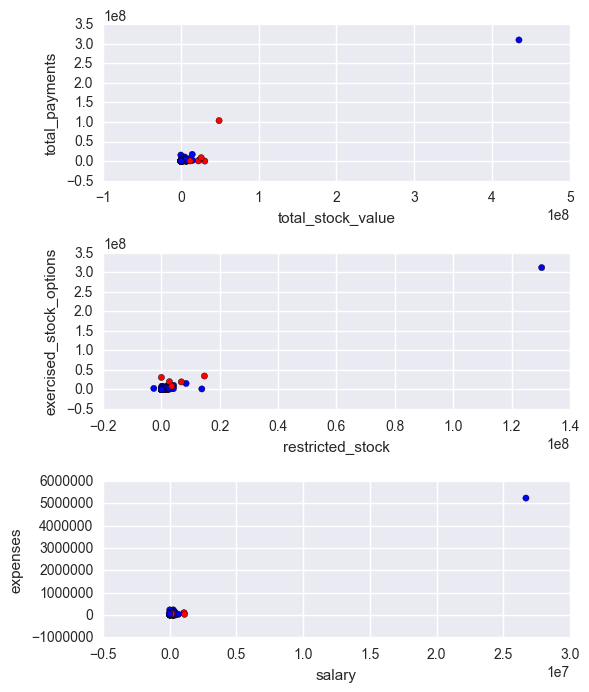

In [10]:
list_of_features_lists = [
    ['poi','total_stock_value', 'total_payments'],
    ['poi', 'restricted_stock', 'exercised_stock_options'],
    ['poi', 'salary', 'expenses']
]

plt.figure(figsize=(6,7))

i = 1  # subplot index
for features_list in list_of_features_lists:
    labels, features = load_features(features_list)
    
    plt.subplot(3,1,i)
    plot_features(features, labels, features_list)
    
    i += 1

    # Print max value for current features
    print(get_n_max_val(features, features_list))

plt.tight_layout()
#plt.savefig('exploration_outliers.png', dpi=400)

In [11]:
for person, values in data_dict.items():
    if values['salary'] == 26704229.0:
        print person

TOTAL


In [12]:
sorted(data_dict.keys())

['ALLEN PHILLIP K',
 'BADUM JAMES P',
 'BANNANTINE JAMES M',
 'BAXTER JOHN C',
 'BAY FRANKLIN R',
 'BAZELIDES PHILIP J',
 'BECK SALLY W',
 'BELDEN TIMOTHY N',
 'BELFER ROBERT',
 'BERBERIAN DAVID',
 'BERGSIEKER RICHARD P',
 'BHATNAGAR SANJAY',
 'BIBI PHILIPPE A',
 'BLACHMAN JEREMY M',
 'BLAKE JR. NORMAN P',
 'BOWEN JR RAYMOND M',
 'BROWN MICHAEL',
 'BUCHANAN HAROLD G',
 'BUTTS ROBERT H',
 'BUY RICHARD B',
 'CALGER CHRISTOPHER F',
 'CARTER REBECCA C',
 'CAUSEY RICHARD A',
 'CHAN RONNIE',
 'CHRISTODOULOU DIOMEDES',
 'CLINE KENNETH W',
 'COLWELL WESLEY',
 'CORDES WILLIAM R',
 'COX DAVID',
 'CUMBERLAND MICHAEL S',
 'DEFFNER JOSEPH M',
 'DELAINEY DAVID W',
 'DERRICK JR. JAMES V',
 'DETMERING TIMOTHY J',
 'DIETRICH JANET R',
 'DIMICHELE RICHARD G',
 'DODSON KEITH',
 'DONAHUE JR JEFFREY M',
 'DUNCAN JOHN H',
 'DURAN WILLIAM D',
 'ECHOLS JOHN B',
 'ELLIOTT STEVEN',
 'FALLON JAMES B',
 'FASTOW ANDREW S',
 'FITZGERALD JAY L',
 'FOWLER PEGGY',
 'FOY JOE',
 'FREVERT MARK A',
 'FUGH JOHN L',
 'GAHN 

In [13]:
# Remove TOTAL from our data set
data_dict.pop('TOTAL')

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

## Trying out RFE; didn't quite work

In [ ]:
# Let's try some RFE
from sklearn.feature_selection import RFE, RFECV
from sklearn.svm import SVC, LinearSVC

In [ ]:
clf = SVC(kernel='linear')
selector = RFECV(clf)
selector = selector.fit(features_train, labels_train)

print("Num Features: %d") % selector.n_features_
print("Selected Features: %s") % selector.support_
print("Feature Ranking: %s") % selector.ranking_

selector.score(features_test, labels_test)

## Trying out SelectPercentile + SelectKBest

In [4]:
from sklearn.feature_selection import SelectPercentile, SelectKBest, f_classif
from sklearn.metrics import precision_score, recall_score
from sklearn.svm import SVC, LinearSVC

In [ ]:
# selector = SelectPercentile(f_classif, percentile=20)
selector = SelectKBest(f_classif, k=3)
selector.fit(features_train, labels_train)

sorted(zip(selector.scores_, features_list[1:]), reverse=True)

In [ ]:
clf = GaussianNB()
# clf_selected = SVC()
clf.fit(features_train, labels_train)
predictions = clf.predict(features_test)
clf.score(features_test, labels_test)

In [ ]:
# Test for errors:
print('Precision: '+str(precision_score(labels_test, predictions)))
print('Recall: '+str(recall_score(labels_test, predictions)))

In [ ]:
clf_selected = GaussianNB()
# clf_selected = SVC()

transformed_features_train = selector.transform(features_train)
transformed_features_test = selector.transform(features_test)

clf_selected.fit(transformed_features_train, labels_train)
pred_selected = clf_selected.predict(transformed_features_test)
clf_selected.score(transformed_features_test, labels_test)

In [ ]:
# Test for errors:
print('Precision: '+str(precision_score(labels_test, pred_selected)))
print('Recall: '+str(recall_score(labels_test, pred_selected)))

In [ ]:
# Trying Decision Trees + AdaBoost
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
n_estimators = 50
clf_selected = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=6, min_samples_leaf=1),
    n_estimators=n_estimators)

transformed_features_train = selector.transform(features_train)
transformed_features_test = selector.transform(features_test)

clf_selected.fit(transformed_features_train, labels_train)
pred_selected = clf_selected.predict(transformed_features_test)
clf_selected.score(transformed_features_test, labels_test)

# clf_selected.feature_importances_

In [ ]:
# Test for errors:
print('Precision: '+str(precision_score(labels_test, pred_selected)))
print('Recall: '+str(recall_score(labels_test, pred_selected)))

In [ ]:
n_estimators = 50
clf = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=6, min_samples_leaf=1),
    n_estimators=n_estimators)

clf.fit(features_train, labels_train)
predictions = clf.predict(features_test)
clf.score(features_test, labels_test)

In [ ]:
# Test for errors:
print('Precision: '+str(precision_score(labels_test, predictions)))
print('Recall: '+str(recall_score(labels_test, predictions)))

In [ ]:
# Let me try SVMs

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(features_train)

clf = SVC()
clf.fit(scaler.transform(features_train), labels_train)

predictions = clf.predict(scaler.transform(features_train))

clf.score(scaler.transform(features_test), labels_test)

In [ ]:
# Test for errors:
print('Precision: '+str(precision_score(labels_test, predictions)))
print('Recall: '+str(recall_score(labels_test, predictions)))

In [ ]:
clf_selected = SVC()

scaled_features_train = scaler.transform(features_train)
scaled_features_test = scaler.transform(features_test)

clf_selected.fit(selector.transform(scaled_features_train), labels_train)
predictions = clf_selected.predict(selector.transform(scaled_features_test))
clf_selected.score(selector.transform(scaled_features_test), labels_test)

In [ ]:
# Test for errors:
print('Precision: '+str(precision_score(labels_test, predictions)))
print('Recall: '+str(recall_score(labels_test, predictions)))

In [ ]:
# clf_selected = SVC(C=0.1)
# clf_selected = SVC(C=1)
# clf_selected = SVC(C=10)
# clf_selected = SVC(C=100)

clf_selected = SVC(gamma=0.01)
# clf_selected = SVC(gamma=1)
# clf_selected = SVC(gamma=10)
# clf_selected = SVC(gamma=100)

scaled_features_train = scaler.transform(features_train)
scaled_features_test = scaler.transform(features_test)

clf_selected.fit(selector.transform(scaled_features_train), labels_train)
predictions = clf_selected.predict(selector.transform(scaled_features_test))
clf_selected.score(selector.transform(scaled_features_test), labels_test)

### Trying GridSearchCV

In [ ]:
from sklearn.grid_search import GridSearchCV

In [ ]:
parameters = {
    'kernel':('linear', 'rbf'),
    'C':[1, 10, 100]
}

svc = SVC()
clf_selected = GridSearchCV(svc, parameters, scoring='f1')

scaled_features_train = scaler.transform(features_train)
scaled_features_test = scaler.transform(features_test)

clf_selected.fit(selector.transform(scaled_features_train), labels_train)
predictions = clf_selected.predict(selector.transform(scaled_features_test))
clf_selected.score(selector.transform(scaled_features_test), labels_test)

clf_selected.grid_scores_

### Trying out StratifiedShuffleSplit

In [5]:
from sklearn.cross_validation import StratifiedShuffleSplit

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
iter_num = 0

precision_list = []
recall_list = []

for train_index, test_index in sss:
    features_train = []
    features_test  = []
    labels_train   = []
    labels_test    = []
    
    for ii in train_index:
        features_train.append( features[ii] )
        labels_train.append( labels[ii] )
    for jj in test_index:
        features_test.append( features[jj] )
        labels_test.append( labels[jj] )
        
    # Select features
    selector = SelectKBest(f_classif, k=3)
    selector.fit(features_train, labels_train)
    print('Features: '+str(sorted(zip(selector.scores_, features_list[1:]), reverse=True)[:3]))
    
    # Classifier
#     clf_selected = DecisionTreeClassifier(random_state=42)
    clf_selected = GaussianNB()

    selected_features_train = selector.transform(features_train)
    selected_features_test = selector.transform(features_test)

    clf_selected.fit(selected_features_train, labels_train)
    pred_selected = clf_selected.predict(selected_features_test)
    
    # Test for errors:
    precision = precision_score(labels_test, pred_selected)
    recall = recall_score(labels_test, pred_selected)
    precision_list.append(precision)
    recall_list.append(recall)
    
    print('Iteration: '+str(iter_num))
    print('Precision: '+str(precision))
    print('Recall: '+str(recall))
    print
    
    iter_num += 1

print('Average precison: '+str(np.mean(precision_list)))
print('Average recall: '+str(np.mean(recall_list)))

Features: [(33.12640430132226, 'exercised_stock_options'), (31.103971689500749, 'total_stock_value'), (14.620549944559839, 'bonus')]
Iteration: 0
Precision: 0.0
Recall: 0.0

Features: [(24.646359132559969, 'bonus'), (16.36536373422858, 'salary'), (12.911242051034087, 'from_poi_to_this_person')]
Iteration: 1
Precision: 0.4
Recall: 0.333333333333

Features: [(13.572295828146965, 'total_stock_value'), (12.544965331095792, 'exercised_stock_options'), (8.7623671063312347, 'restricted_stock')]
Iteration: 2
Precision: 0.666666666667
Recall: 0.333333333333

Features: [(24.748238683098151, 'bonus'), (14.305980058702911, 'salary'), (13.688824982167588, 'exercised_stock_options')]
Iteration: 3
Precision: 0.375
Recall: 0.5

Features: [(37.293836432657912, 'total_stock_value'), (36.004705633924253, 'exercised_stock_options'), (23.816083722636385, 'salary')]
Iteration: 4
Precision: 0.2
Recall: 0.166666666667

Features: [(6.112901980205355, 'exercised_stock_options'), (5.6255269533234911, 'total_stoc

In [30]:
#!/usr/bin/python

import sys
import pickle
sys.path.append("./tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Initializing dataset for local testing
features_list = ['poi',
                 'total_stock_value',
                 'total_payments',
                 'restricted_stock',
                 'exercised_stock_options',
                 'salary',
                 'expenses',
                 'other',
                 'to_messages',
                 'shared_receipt_with_poi',
                 'from_messages',
                 'from_this_person_to_poi',
                 'from_poi_to_this_person',
                 'bonus']

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

data_dict.pop('TOTAL')

my_dataset = data_dict

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)


def test_classifier(clf, data_sets):
    iter_num = 0

    precision_list = []
    recall_list = []


    for data_set in data_sets:
        features_train, labels_train, features_test, labels_test = data_set

        # Select features
        selector = SelectKBest(f_classif, k=3)
        selector.fit(features_train, labels_train)
        print('Features: '+str(sorted(zip(selector.scores_, features_list[1:]), reverse=True)[:3]))

        selected_features_train = selector.transform(features_train)
        selected_features_test = selector.transform(features_test)

        # Fit classifier and make predictions
        clf.fit(selected_features_train, labels_train)
        pred_selected = clf.predict(selected_features_test)

        # Test for errors:
        precision = precision_score(labels_test, pred_selected)
        recall = recall_score(labels_test, pred_selected)
        precision_list.append(precision)
        recall_list.append(recall)

        print('Iteration: '+str(iter_num))
        print('Precision: '+str(precision))
        print('Recall: '+str(recall))
        print

        iter_num += 1

    print('classifier: '+str(clf))
    print('Average precison: '+str(np.mean(precision_list)))
    print('Average recall: '+str(np.mean(recall_list)))
    print


def split_data_sss(features, labels):
    '''Uses StratifiedShuffleSplit to create train and test data.
    Returns a list of tuples.'''
    sss = StratifiedShuffleSplit(y=labels, test_size=0.3, n_iter=10)

    train_test_sets = []

    for train_index, test_index in sss:
        features_train = []
        features_test  = []
        labels_train   = []
        labels_test    = []

        for i in train_index:
            features_train.append(features[i])
            labels_train.append(labels[i])
        for j in test_index:
            features_test.append(features[j])
            labels_test.append(labels[j])

        train_test_sets.append((features_train, labels_train, features_test, labels_test))

    return train_test_sets


# Test our classifiers
classifiers = [
    GaussianNB(),
    DecisionTreeClassifier(random_state=42)
]

# Split data into train/test data sets
data_sets = split_data_sss(features, labels)

for clf in classifiers:
    test_classifier(clf, data_sets)


Features: [(19.851480459108362, 'total_stock_value'), (18.783178629404901, 'salary'), (18.513351955185772, 'exercised_stock_options')]
Iteration: 0
Precision: 0.5
Recall: 0.166666666667

Features: [(33.993753207587233, 'exercised_stock_options'), (33.388385769918351, 'total_stock_value'), (16.296275469892503, 'restricted_stock')]
Iteration: 1
Precision: 0.0
Recall: 0.0

Features: [(48.533256754874344, 'bonus'), (26.577439567129737, 'salary'), (22.806047189778347, 'from_poi_to_this_person')]
Iteration: 2
Precision: 0.142857142857
Recall: 0.166666666667

Features: [(15.400806320576233, 'total_stock_value'), (14.319789747511768, 'exercised_stock_options'), (8.6488879472668643, 'salary')]
Iteration: 3
Precision: 0.5
Recall: 0.333333333333

Features: [(36.31455668106581, 'exercised_stock_options'), (32.300425900576052, 'total_stock_value'), (16.03670907755502, 'bonus')]
Iteration: 4
Precision: 1.0
Recall: 0.166666666667

Features: [(14.464154965085038, 'bonus'), (10.217587422217761, 'salary

In [32]:
tup = (23.18661338478892, 'exercised_stock_options')
tup[1]

'exercised_stock_options'

## New feature

In [1]:
def create_proportion_from_poi(data_point):
    '''Creates a new feature: The proportion of all emails received by this person
    that were sent from a POI.'''

    FEATURE_NAME = 'proportion_from_poi'

    data_point[FEATURE_NAME] = float(data_point['from_poi_to_this_person'])/float(data_point['to_messages'])


def update_data_dict_proportion_from_poi(data_dict):
    '''Updates data_dict with new feature.'''

    for data in data_dict.values():
        create_proportion_from_poi(data)

In [4]:
update_data_dict_proportion_from_poi(data_dict)

In [9]:
proportion_from_poi_list = []
for person, data in data_dict.items():
    proportion_from_poi_list.append((person, data['proportion_from_poi']))
    
sorted(proportion_from_poi_list, key=lambda x: x[1], reverse=True)

[('BAXTER JOHN C', nan),
 ('ELLIOTT STEVEN', nan),
 ('MORDAUNT KRISTINA M', nan),
 ('LOWRY CHARLES P', nan),
 ('COLWELL WESLEY', 0.13651877133105803),
 ('UMANOFF ADAM S', 0.10810810810810811),
 ('JACKSON CHARLENE R', 0.09689922480620156),
 ('MULLER MARK S', 0.08823529411764706),
 ('HUMPHREY GENE E', 0.078125),
 ('PIPER GREGORY F', 0.049273021001615507),
 ('METTS MARK', 0.04708798017348203),
 ('HANNON KEVIN P', 0.03062200956937799),
 ('SUNDE MARTIN', 0.013978088401964487),
 ('BLACHMAN JEREMY M', 0.010101010101010102),
 ('GIBBS DANA R', 0.0),
 ('WESTFAHL RICHARD K', nan),
 ('WALTERS GARETH W', nan),
 ('KITCHEN LOUISE', 0.030222757375075255),
 ('WALLS JR ROBERT H', 0.02533532041728763),
 ('MCMAHON JEFFREY', 0.024628450106157114),
 ('HORTON STANLEY C', 0.01872340425531915),
 ('CORDES WILLIAM R', 0.013089005235602094),
 ('MEYER ROCKFORD G', 0.0),
 ('CHAN RONNIE', nan),
 ('BELFER ROBERT', nan),
 ('SHANKMAN JEFFREY A', 0.029183483390251473),
 ('WODRASKA JOHN', nan),
 ('URQUHART JOHN A', nan),